# GBRT graphs

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
style.use('seaborn-v0_8-ticks')

ModuleNotFoundError: No module named 'seaborn'

*Available targets = { 'h', 'GV1', 'GV3', 'GV51', 'MB4', 'MB8', 'MB10', 'MB18'}*

In [5]:
# Set target
target = 'MB8'
unit = 'MASL' if 'GV' in target else 'L/s' if 'MB' in target else None

with open(f'plotting_data/GBRT/GBRT_{target}_plotting_data.pkl', 'rb') as f:
    plotting_data = pickle.load(f)

# Extract data for plotting
X = plotting_data['X']
X_all = plotting_data['X_all']
dates = plotting_data['dates']
actual_y = plotting_data['actual_y']
predictions = plotting_data['predictions']
split_index = plotting_data['split_index']
# split_index_val = plotting_data['split_index_val']
RMSE = plotting_data['RMSE']
MAE = plotting_data['MAE']
NSE = plotting_data['NSE']
KGE = plotting_data['KGE']

# Split according to train, validation and test size
y_train = actual_y.iloc[:split_index]
y_test = actual_y.iloc[split_index:] 
train_predictions = predictions[:split_index]
test_predictions = predictions[split_index:]
test_dates = dates.iloc[split_index:]

print("Data loaded")

Data loaded


<Figure size 640x480 with 0 Axes>

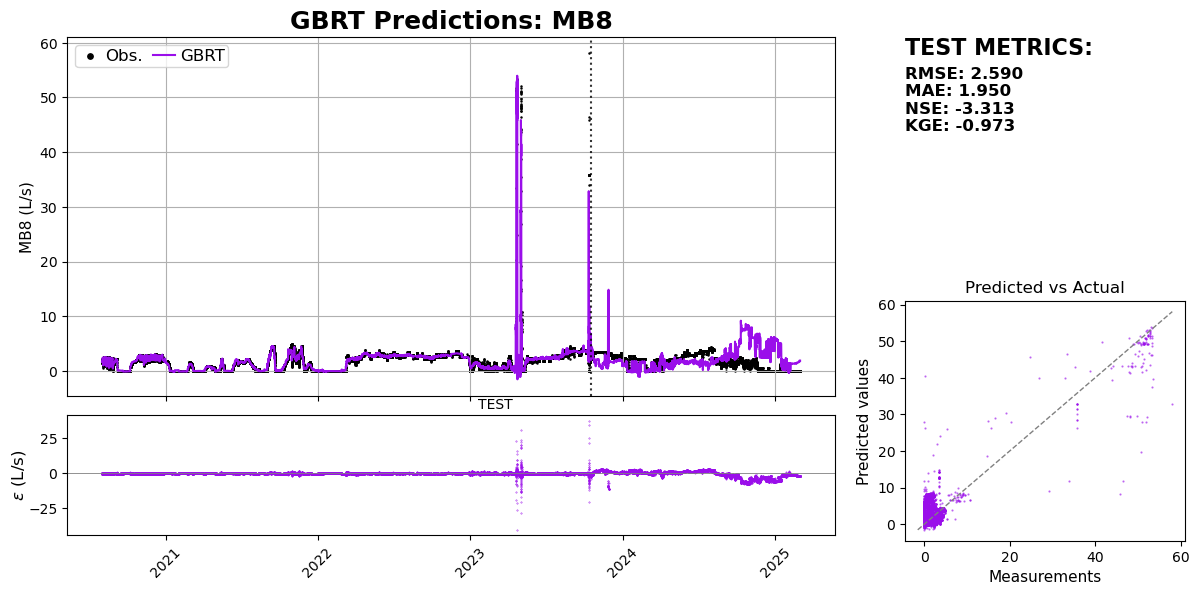

In [6]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)  
color_GBRT = '#9a0eea'

# Data and predictions
ax1.scatter(dates, actual_y, color='black', s=0.6, label='Obs.')
# ax1.plot(dates, actual_y, color='blue', linewidth=0.5, alpha=0.3)
ax1.plot(dates, predictions, color=color_GBRT, linewidth=1.5, label='GBRT')
ax1.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
fig.text(0.345, 0.31, 'TEST', color='black')

# ax1.axvline(x=dates.iloc[split_index_val], color='black', alpha=0.8, linestyle=':')
# fig.text(0.46, 0.31, 'TEST', color='black')

ax1.set_ylabel(f'{target} ({unit})', color='black', fontsize=11)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', fontsize=12, ncols=2, markerscale=5, \
           columnspacing=0.6, handlelength=1.3, handletextpad=0.3, borderpad=0.2)
ax1.set_title(f'GBRT Predictions: {target}', fontsize=18, fontweight='bold')
ax1.grid()

# Residuals
residuals = actual_y - predictions
ax2.scatter(dates, residuals, color=color_GBRT, s=0.1)
ax2.axhline(y=0, color='gray', linewidth=0.6, linestyle='-')
ax2.set_ylabel(rf'$\epsilon$ ({unit})', color='black', fontsize=12, labelpad=0)
# ax2.set_ylim(-4, 4)
# ax2.set_yticks(range(-4, 5, 2))
# ax2.tick_params(axis='y', labelcolor='black')

# Formatting
plt.xticks(rotation=45)  
fig.tight_layout()  

# Text
fig.subplots_adjust(right=0.6)
title_text = "TEST METRICS:"
rmse_text = f'RMSE: {RMSE:.3f}'
mae_text = f'MAE: {MAE:.3f}'
NSE_text = f"NSE: {NSE:.3f}"
KGE_text = f"KGE: {KGE:.3f}"

metrics_text = '\n'.join([rmse_text, mae_text, NSE_text, KGE_text])
fig.text(0.65, 0.93, title_text, verticalalignment='top', fontweight='bold', fontsize=16)
fig.text(0.65, 0.88, metrics_text, verticalalignment='top', fontweight='bold', fontsize=12)

# Scatter plot for predicted vs measured values
ax3 = fig.add_axes([0.65, 0.09, 0.2, 0.4]) #type: ignore (Manually placed)

# Add a grey diagonal line from bottom-left to top-right
min_val = min(actual_y.min(), predictions.min())
max_val = max(actual_y.max(), predictions.max())
ax3.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', linewidth=1)

# Plot
ax3.scatter(actual_y, predictions, color=color_GBRT, alpha=0.5, s=0.3, marker='D')
ax3.set_xlabel(f'Measurements', fontsize=11)
ax3.set_ylabel(f'Predicted values', fontsize=11)
ax3.set_title(f'Predicted vs Actual', fontsize=12)

plt.show()

# # Optimize quality by saving the plot with high DPI
# plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')

# # Alternatively, saving in vector format (SVG or PDF) to maintain quality on zoom
# plt.savefig('high_quality_plot_SVG.svg', dpi=300, bbox_inches='tight')

# Deviance, Feautre permutation importance, QQ-plot

In [127]:
with open('plotting_data/GBRT_MB1_HM_L51_plotting_data.pkl', 'rb') as f:
    plotting_data = pickle.load(f)

train_score = plotting_data['train_score']
test_score = plotting_data['test_score']
iterations = plotting_data['iterations']
perm_importances = plotting_data['perm_importances']
perm_labels = plotting_data['perm_labels']

train_score_trimmed = train_score[1:]

plt.clf()

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    iterations,
    train_score_trimmed,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    iterations, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'plotting_data/GBRT_MB1_HM_L51_plotting_data.pkl'

C:\Users\xkorpijo3\AppData\Local\Temp\ipykernel_22416\1856060017.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


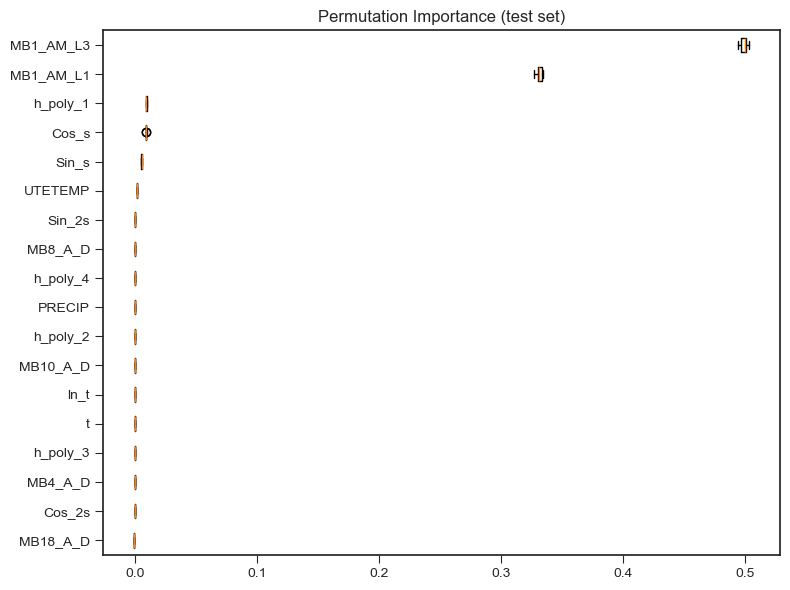

In [56]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.boxplot(
    perm_importances,
    vert=False,
    labels=perm_labels,
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

c:\Users\xkorpijo3\AppData\Local\miniconda3\envs\test_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12046.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.918, P-Value: 0.000


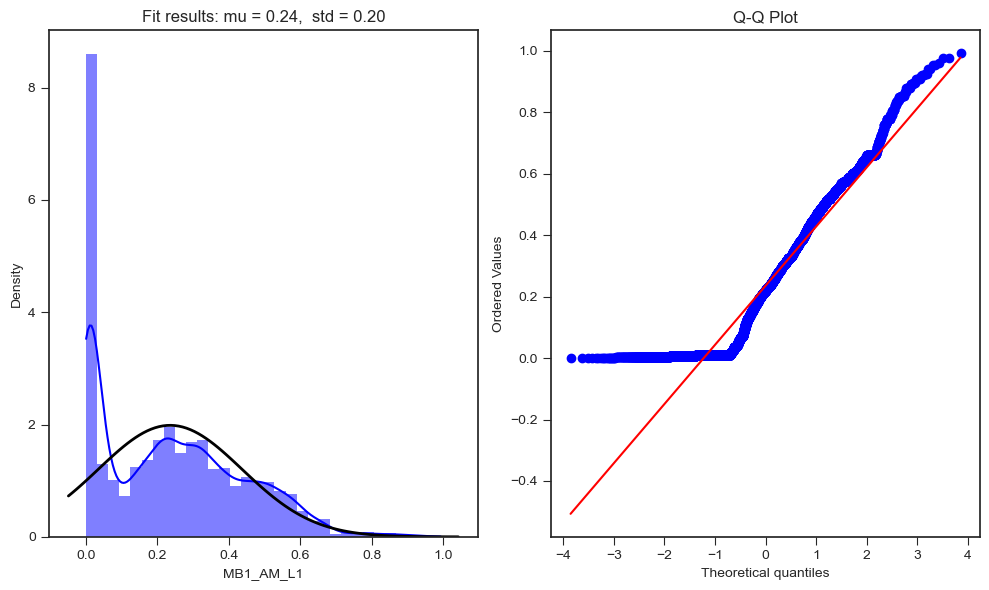

In [57]:
test_residuals = np.abs(y_test - test_predictions)
stat, p_value = stats.shapiro(test_residuals)
print(f"Shapiro-Wilk Test Statistic: {stat:.3f}, P-Value: {p_value:.3f}")

# Histogram with Normal Curve
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(test_residuals, kde=True, color='blue', stat="density", linewidth=0)
mean_res = np.mean(test_residuals)
std_res = np.std(test_residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_res, std_res)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mean_res, std_res)
plt.title(title)

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# SHAP PLOTS

In [35]:
import shap
with open('models/GBRT_model_MB1_HM_L51.pkl', 'rb') as file:
    model = pickle.load(file)
    
X_train = X_all.iloc[:split_idx]
X_test = X_all.iloc[split_idx:]

explainer = shap.TreeExplainer(model)
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)


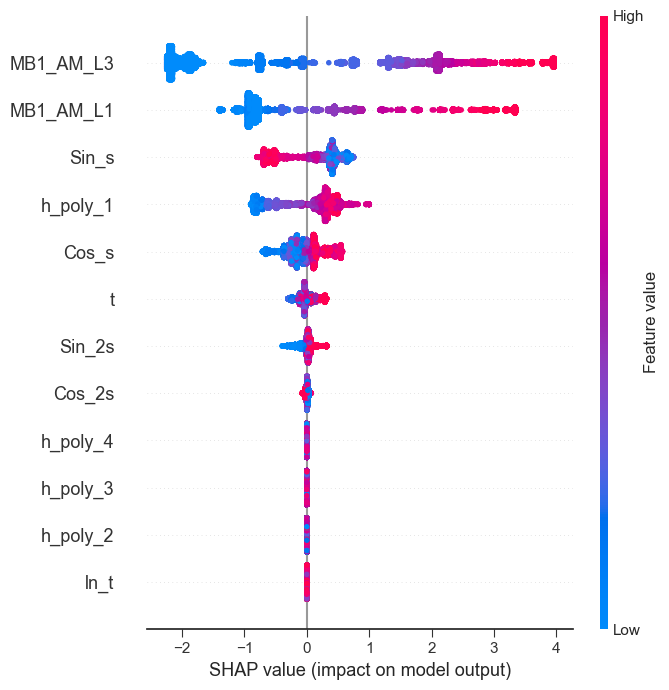

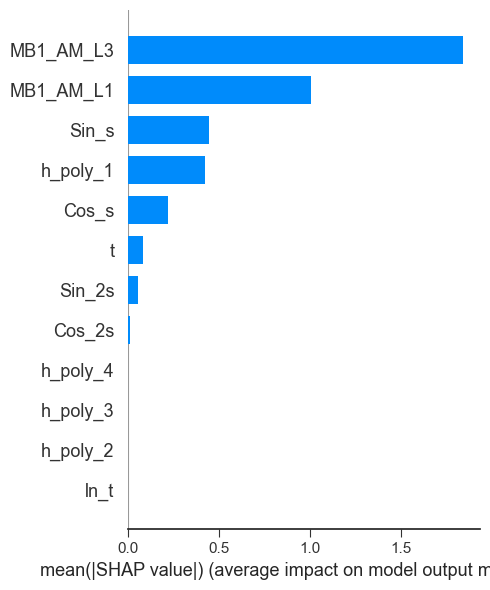

In [36]:
# Plot the SHAP summary plot
plt.figure()
shap.summary_plot(shap_values_train, X_train, plot_size=(7,7))

# To see the importance of specific features, use the bar plot
plt.figure()
shap.summary_plot(shap_values_train, X_train, plot_type="bar", plot_size=(5,6))

In [37]:
shap.initjs()
#peak 6907
shap.force_plot(explainer.expected_value, shap_values_test[1000], X_test.iloc[1000])

In [38]:
shap.initjs()
subset_indices = list(range(0, len(X_test), 24))
#subset_indices = list(range(6000, 7000, 24))
X_test_subset = X_test.iloc[subset_indices]
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test_subset), X_test.iloc[subset_indices], figsize=(20, 10))

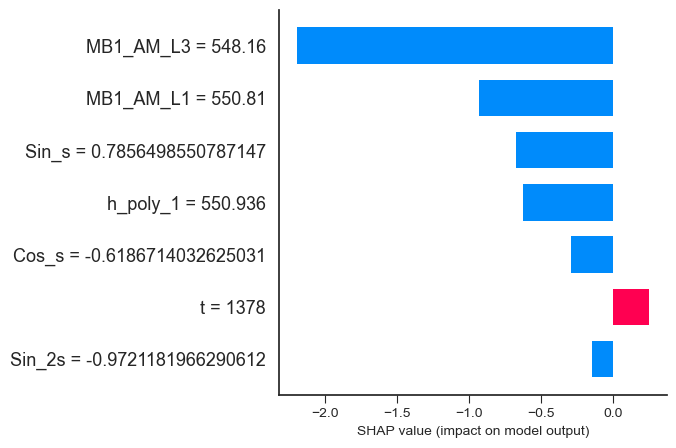

In [41]:
plt.figure(figsize=(5,5))
shap.bar_plot(shap_values_test[4946], features=X.iloc[split_idx+4946])

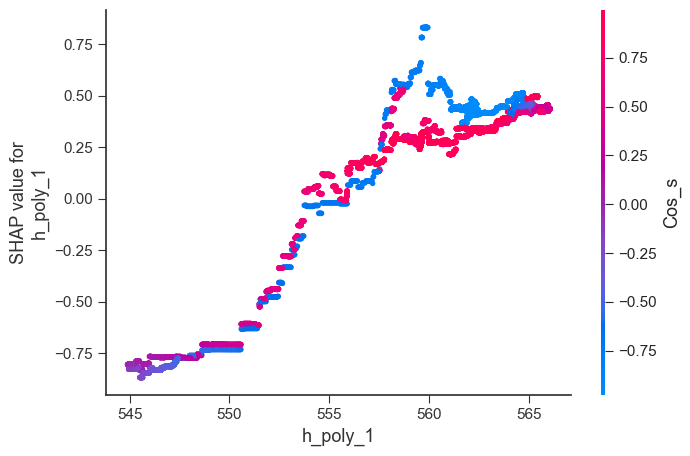

In [42]:

"""inds = shap.approximate_interactions("DPM_12", shap_values_test, X_test)
print(inds)
plt.figure()
for i in range(2):
    shap.dependence_plot('DPM_12', shap_values_test, X.iloc[split_idx:], interaction_index=inds[i])"""

shap.dependence_plot('h_poly_1', shap_values_test, X.iloc[split_idx:])


In [44]:
plt.figure(figsize=(7, 7))

desired_feature_order = ['h_poly', 'h', 'MB1_AM_L1', 'MB1_AM_L3', 'MB4', 'MB8', 'MB10', 'MB18', 'P', \
                        'T_A', 't', 'ln_t', 'Cos_s', 'Sin_s', 'Cos_2s', 'Sin_2s']

desired_feature_order.reverse()
feature_name_to_index = {name: idx for idx, name in enumerate(X_test.columns)}
feature_order = [feature_name_to_index[name] for name in desired_feature_order]
threshold = np.percentile(test_residuals, 90)
outlier_indices = np.where(test_residuals >= threshold)[0]
shap.decision_plot(explainer.expected_value, shap_values_test[outlier_indices], X_test.iloc[outlier_indices], feature_order=feature_order, auto_size_plot=False, xlim=(0.2,0.9))

plt.figure(figsize=(7, 7))
threshold = np.percentile(test_residuals, 10)
closest_indices = np.where(test_residuals <= threshold)[0]
shap.decision_plot(explainer.expected_value, shap_values_test[closest_indices], X_test.iloc[closest_indices], feature_order=feature_order, auto_size_plot=False, xlim=(0.2,0.9))

"""
date_ranges = [
    ('2022-09-01', '2022-11-01'),
    ('2023-01-01', '2023-03-01'),
    ('2023-05-01', '2023-07-01'),
]

# Initialize a list to collect indices
selected_indices = []

# Find indices for each date range
for start_date, end_date in date_ranges:
    start_index = np.where(test_dates >= pd.to_datetime(start_date))[0][0]
    end_index = np.where(test_dates >= pd.to_datetime(end_date))[0][0]
    # Append all indices within the range
    selected_indices.extend(range(start_index, end_index, 24))

# Ensure indices are unique and sorted
selected_indices = sorted(list(set(selected_indices)))

# Plot the SHAP decision plot for the selected indices
shap.decision_plot(explainer.expected_value, shap_values_test[selected_indices], X_test.iloc[selected_indices])
"""

"""
print(np.mean(test_predictions))
subset_indices = list(range(0, len(X_test), 10))
X_test_subset = X_test.iloc[subset_indices]
shap_values_test_subset = explainer.shap_values(X_test_subset)
shap.decision_plot(explainer.expected_value, shap_values_test_subset, X_test_subset, auto_size_plot=False)
"""

"""
T = X_test[test_predictions >= 361.25]
#T = X_test[test_predictions <= 359]
sh = explainer.shap_values(T)
shap.decision_plot(explainer.expected_value, sh, T, feature_order="hclust", auto_size_plot=False)
"""

KeyError: 'T_A'